## Import Required Libraries and Load Dataset

In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
testing_data = '../data/testing.csv'
training_data = '../data/training.csv'
validation_data = '../data/validation.csv'

train = pd.read_csv(training_data)
test = pd.read_csv(validation_data)
train.head()

,recordId,drugName,condition,reviewComment,date,usefulCount,sideEffects,rating
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...","February 28, 2012",22,Mild Side Effects,5
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...","May 17, 2009",17,Severe Side Effects,4
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""","September 29, 2017",3,No Side Effects,5
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...","March 5, 2017",35,Mild Side Effects,5
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...","October 22, 2015",4,Severe Side Effects,5


In [7]:
# as both the dataset contains same columns we can combine them for better analysis

data = pd.concat([train, test])
data.head()

,recordId,drugName,condition,reviewComment,date,usefulCount,sideEffects,rating
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...","February 28, 2012",22,Mild Side Effects,5
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...","May 17, 2009",17,Severe Side Effects,4
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""","September 29, 2017",3,No Side Effects,5
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...","March 5, 2017",35,Mild Side Effects,5
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...","October 22, 2015",4,Severe Side Effects,5


## Descriptive Statistics

In [8]:
# describing the data

data.describe()

,recordId,usefulCount,rating
count,8198.000000,8198.000000,8198.000000
mean,117871.197243,28.446816,3.711271
std,66960.625374,40.008469,1.558958
min,6.000000,0.000000,1.000000
25%,59554.250000,6.000000,2.000000
50%,118865.500000,16.000000,4.000000
75%,175682.500000,36.000000,5.000000
max,232237.000000,949.000000,5.000000


In [9]:
# taking out information from the data

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8198 entries, 0 to 1198
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   recordId       8198 non-null   int64 
 1   drugName       8198 non-null   object
 2   condition      8159 non-null   object
 3   reviewComment  8198 non-null   object
 4   date           8198 non-null   object
 5   usefulCount    8198 non-null   int64 
 6   sideEffects    8198 non-null   object
 7   rating         8198 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 576.4+ KB


In [10]:
# get the datatype of columns

data.dtypes

recordId          int64
drugName         object
condition        object
reviewComment    object
date             object
usefulCount       int64
sideEffects      object
rating            int64
dtype: object

In [11]:
# checking if the data contains any NULL values

data.isnull().any()

recordId         False
drugName         False
condition         True
reviewComment    False
date             False
usefulCount      False
sideEffects      False
rating           False
dtype: bool

In [ ]:
# Fill missing values
data['condition'].fillna('unknow',inplace = True)
data.dropna(inplace = True)
data.isnull().sum()

## VISUALIZATION OF DRUG NAMES / RATINGS / CONDITIONS

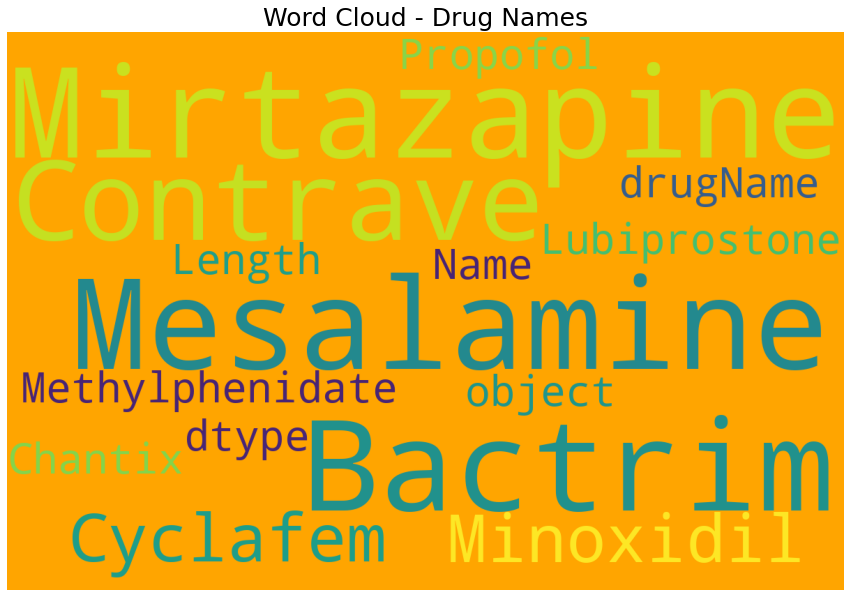

In [13]:
# let's see the words cloud for the reviews 

# most popular drugs

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'orange', stopwords = stopwords, width = 1200, height = 800).generate(str(data['drugName']))

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Word Cloud - Drug Names', fontsize = 25)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

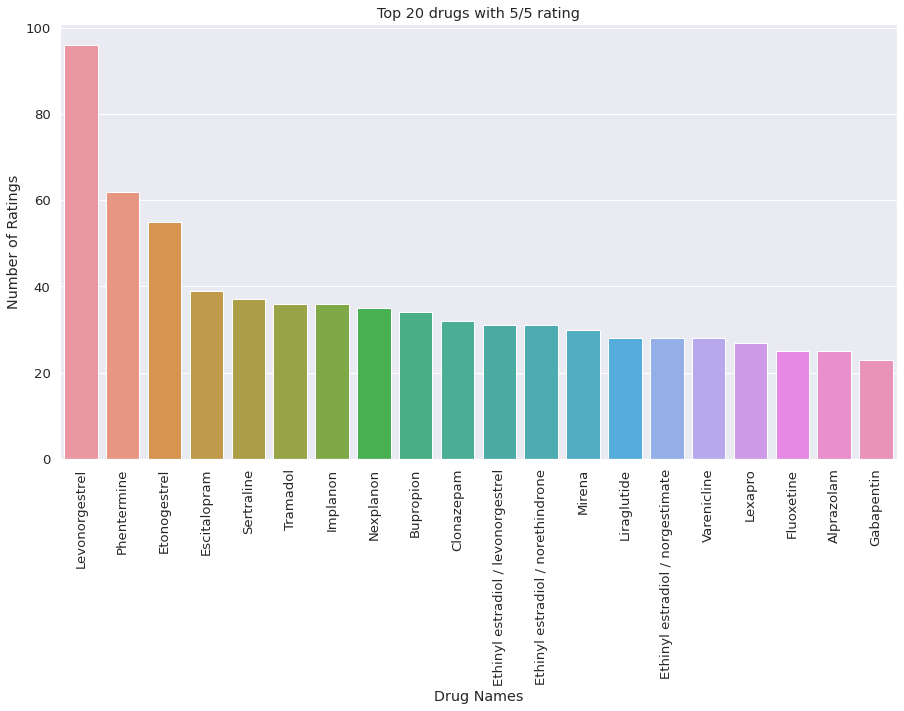

In [21]:
# This barplot shows the top 20 drugs with the 5/5 rating

# Setting the Parameter
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(data.loc[data.rating == 5, "drugName"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20])

sns_rating.set_title('Top 20 drugs with 5/5 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90);

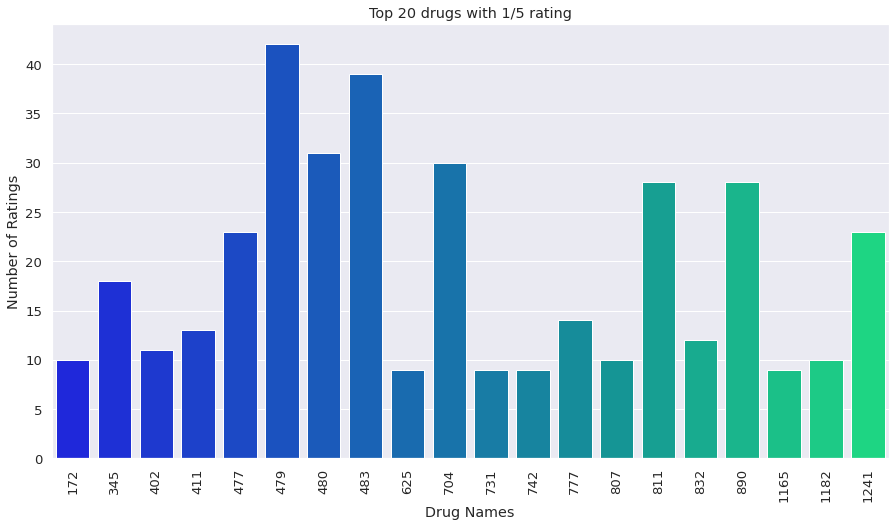

In [136]:
# This barplot shows the Top 20 drugs with the 1/5 rating

# Setting the Parameter
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(data.loc[data.rating == 1, "drugName"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20], palette = 'winter')

sns_rating.set_title('Top 20 drugs with 1/5 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90);

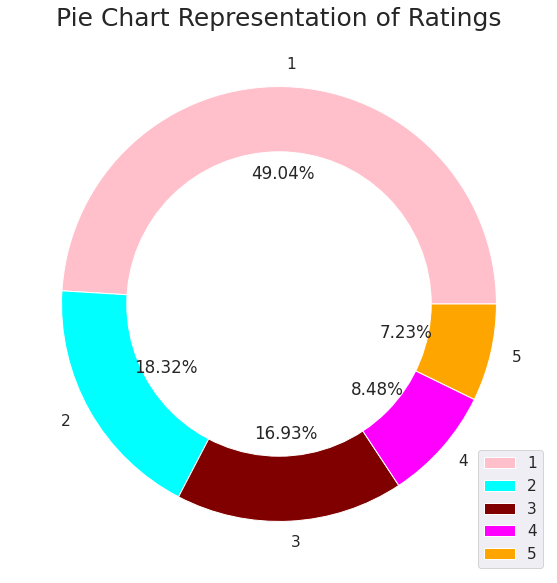

In [54]:
# making a donut chart to represent share of each ratings

size = [4020, 1502, 1388, 695, 593]
colors = ['pink', 'cyan', 'maroon',  'magenta', 'orange']
labels = "5", "1", "4", "3", "2"

my_circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (10,10)
plt.pie(size, colors = colors, labels = labels, autopct = '%.2f%%')
plt.axis('off')
plt.title('Pie Chart Representation of Ratings', fontsize = 25)
p = plt.gcf()
plt.gca().add_artist(my_circle)
plt.legend()
plt.show()

In [41]:
pd.value_counts([i for i in data['rating']])

5    4020
1    1502
4    1388
3     695
2     593
dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Rating')

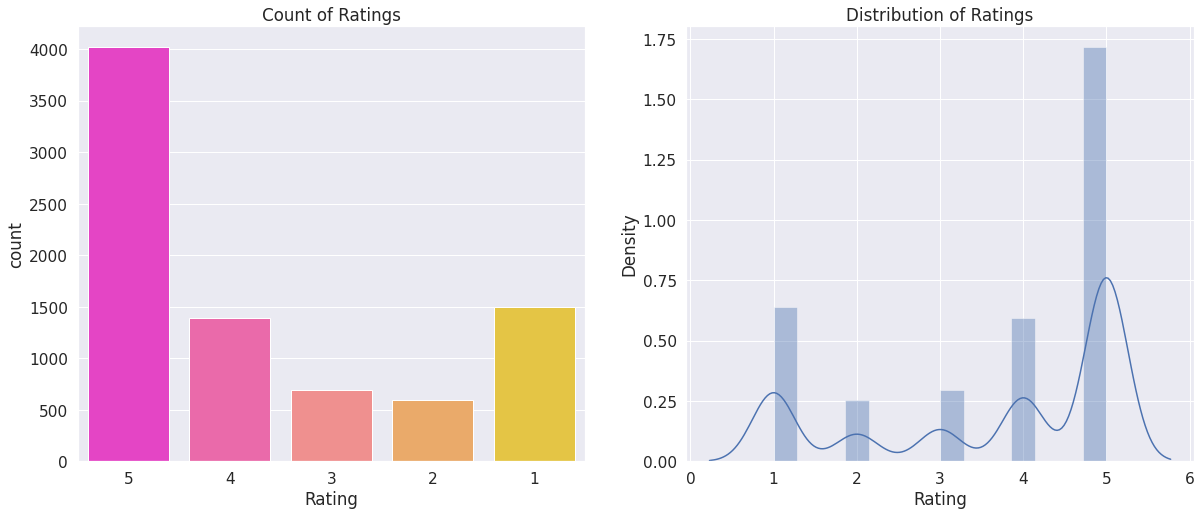

In [28]:
# A countplot of the ratings so we can see the distribution of the ratings
plt.rcParams['figure.figsize'] = [20,8]
sns.set(font_scale = 1.4, style = 'darkgrid')
fig, ax = plt.subplots(1, 2)

sns_1 = sns.countplot(data['rating'], palette = 'spring', order = list(range(5, 0, -1)), ax = ax[0])
sns_2 = sns.distplot(data['rating'], ax = ax[1])
sns_1.set_title('Count of Ratings')
sns_1.set_xlabel("Rating")

sns_2.set_title('Distribution of Ratings')
sns_2.set_xlabel("Rating")

Text(0, 0.5, 'Count')

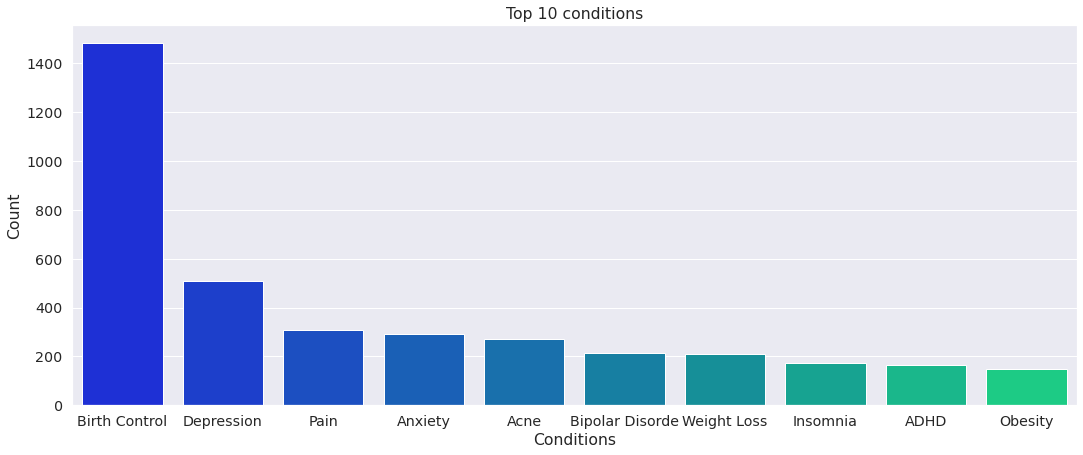

In [55]:
# This barplot show the top 10 conditions the people are suffering.
cond = dict(data['condition'].value_counts())
top_condition = list(cond.keys())[0:10]
values = list(cond.values())[0:10]
sns.set(style = 'darkgrid', font_scale = 1.3)
plt.rcParams['figure.figsize'] = [18, 7]

sns_ = sns.barplot(x = top_condition, y = values, palette = 'winter')
sns_.set_title("Top 10 conditions")
sns_.set_xlabel("Conditions")
sns_.set_ylabel("Count")

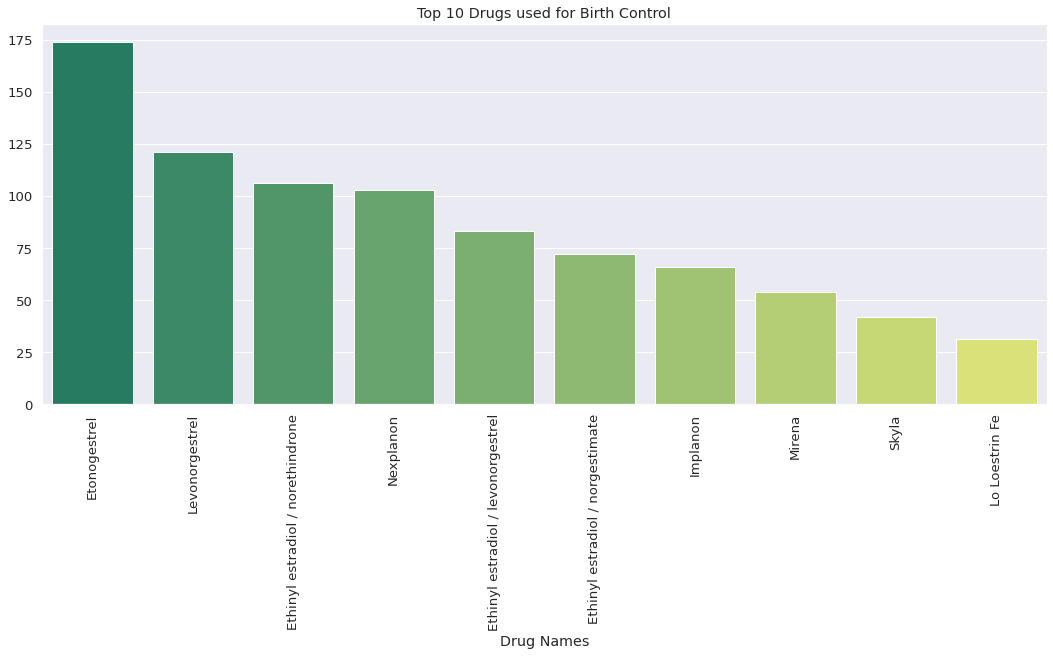

In [56]:
# Top 10 drugs which are used for the top condition, that is Birth Control
df1 = data[data['condition'] == 'Birth Control']['drugName'].value_counts()[0: 10]
sns.set(font_scale = 1.2, style = 'darkgrid')

sns_ = sns.barplot(x = df1.index, y = df1.values, palette = 'summer')
sns_.set_xlabel('Drug Names')
sns_.set_title("Top 10 Drugs used for Birth Control")
plt.setp(sns_.get_xticklabels(), rotation = 90);

## VISUALIZATION OF REVIEWS

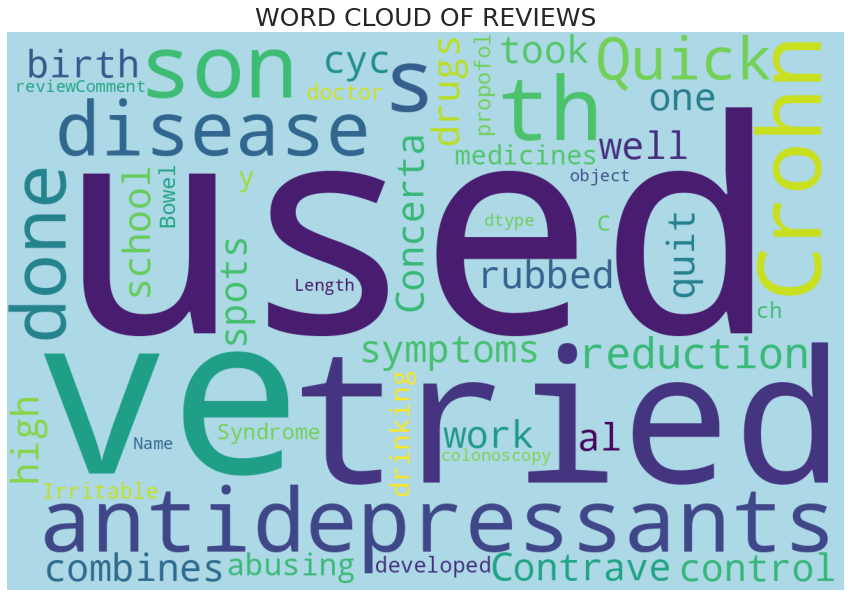

In [58]:
# let's see the words cloud for the reviews 

# most popular drugs

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'lightblue', stopwords = stopwords, width = 1200, height = 800).generate(str(data['reviewComment']))

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('WORD CLOUD OF REVIEWS', fontsize = 25)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [59]:
# feature engineering 
# let's make a new column review sentiment 

data.loc[(data['rating'] >= 5), 'Review_Sentiment'] = 1
data.loc[(data['rating'] < 5), 'Review_Sentiment'] = 0

data['Review_Sentiment'].value_counts()

0.0    4178
1.0    4020
Name: Review_Sentiment, dtype: int64

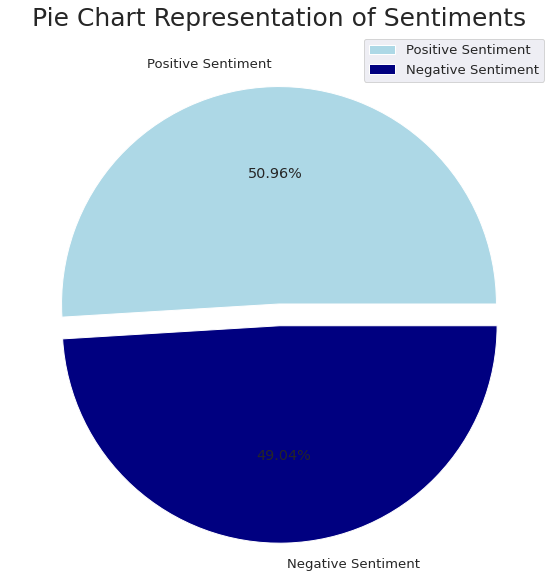

In [61]:
# a pie chart to represent the sentiments of the patients

size = [4178, 4020]
colors = ['lightblue', 'navy']
labels = "Positive Sentiment","Negative Sentiment"
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, explode = explode, autopct = '%.2f%%')
plt.axis('off')
plt.title('Pie Chart Representation of Sentiments', fontsize = 25)
plt.legend()
plt.show()

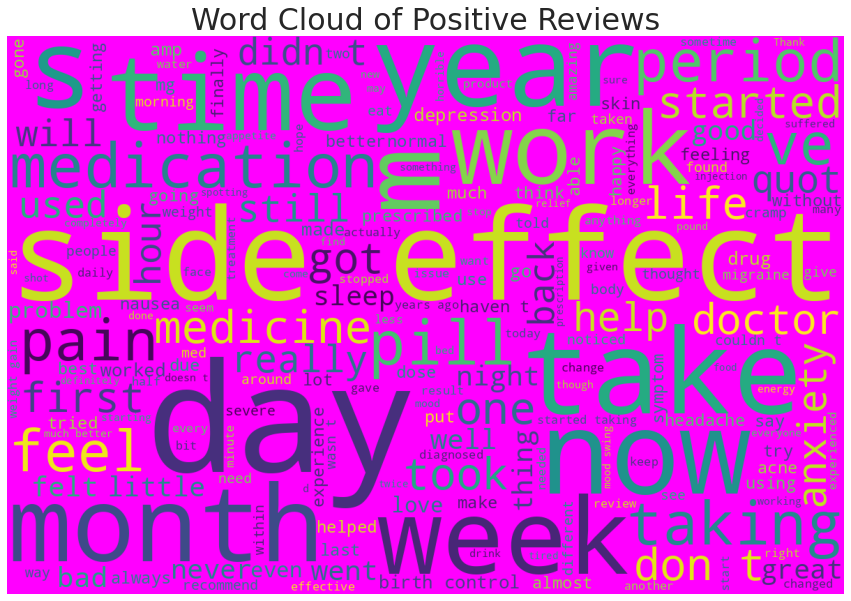

In [63]:
# making Words cloud for the postive sentiments

positive_sentiments = " ".join([text for text in data['reviewComment'][data['Review_Sentiment'] == 1]])

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'magenta', stopwords = stopwords, width = 1200, height = 800).generate(positive_sentiments)

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Word Cloud of Positive Reviews', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

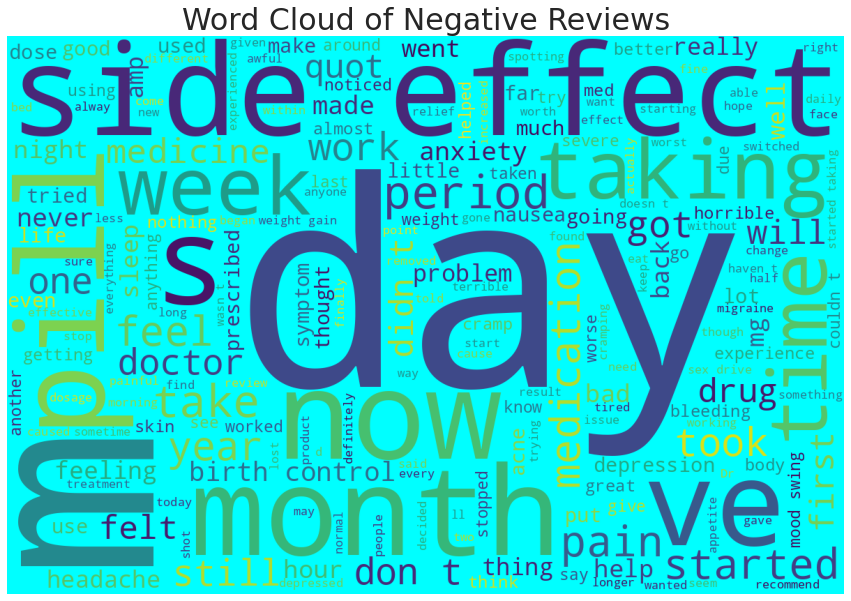

In [64]:
# making wordscloud for the Negative sentiments

negative_sentiments = " ".join([text for text in data['reviewComment'][data['Review_Sentiment'] == 0]])

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'cyan', stopwords = stopwords, width = 1200, height = 800).generate(negative_sentiments)

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Word Cloud of Negative Reviews', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

## VISUALIZATION OF REVIEWS BASED ON DATETIME

In [65]:
# converting the date into datetime format
data['date'] = pd.to_datetime(data['date'], errors = 'coerce')

# now extracting year from date
data['Year'] = data['date'].dt.year

# extracting the month from the date
data['month'] = data['date'].dt.month

# extracting the days from the date
data['day'] = data['date'].dt.day

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


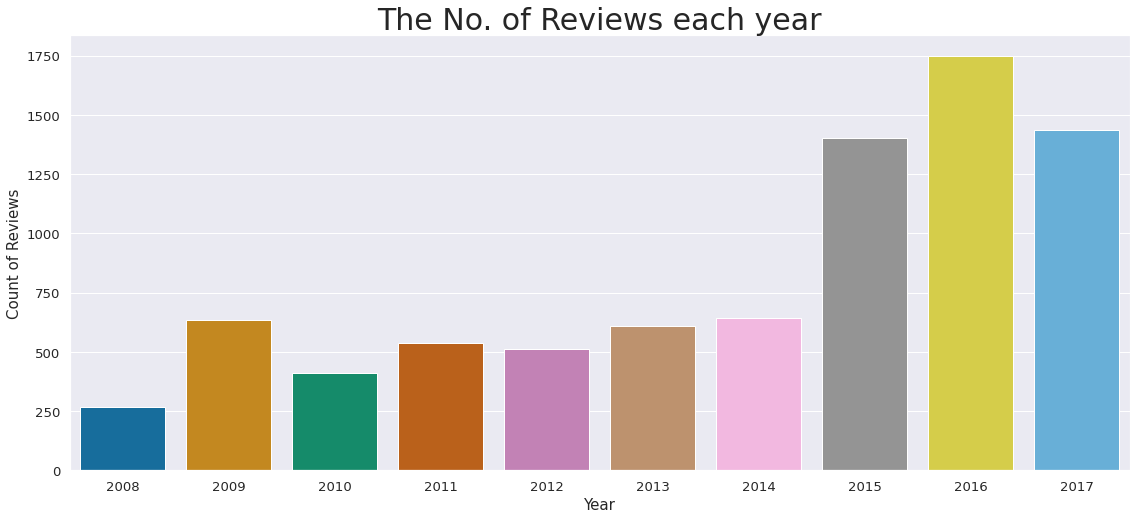

In [66]:
# looking at the no. of reviews in each of the year

plt.rcParams['figure.figsize'] = (19, 8)
sns.countplot(data['Year'], palette ='colorblind')
plt.title('The No. of Reviews each year', fontsize = 30)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Count of Reviews', fontsize = 15)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


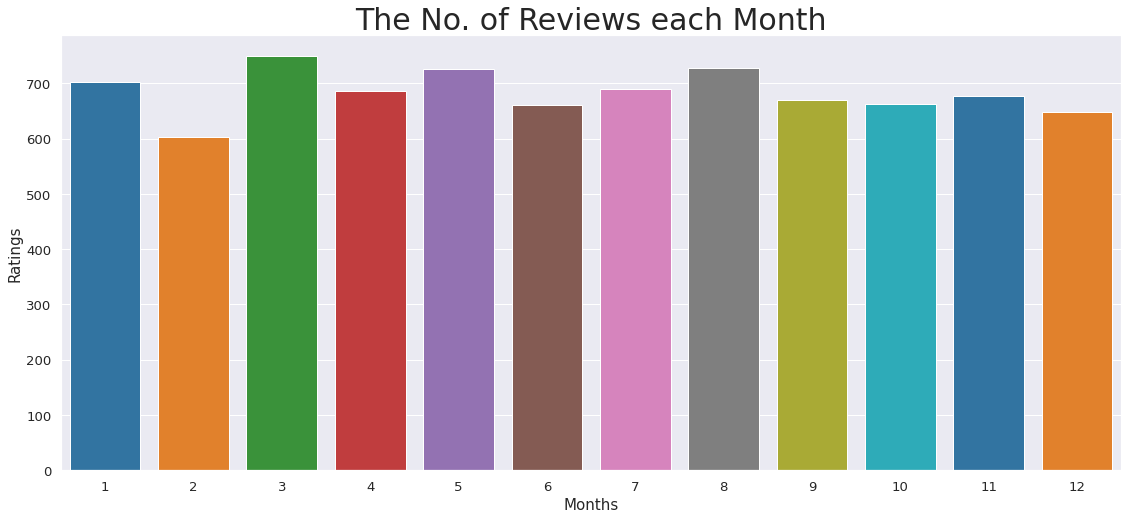

In [67]:
# looking at the no. of reviews in each of the months

plt.rcParams['figure.figsize'] = (19, 8)
sns.countplot(data['month'], palette ='tab10')
plt.title('The No. of Reviews each Month', fontsize = 30)
plt.xlabel('Months', fontsize = 15)
plt.ylabel('Ratings', fontsize = 15)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


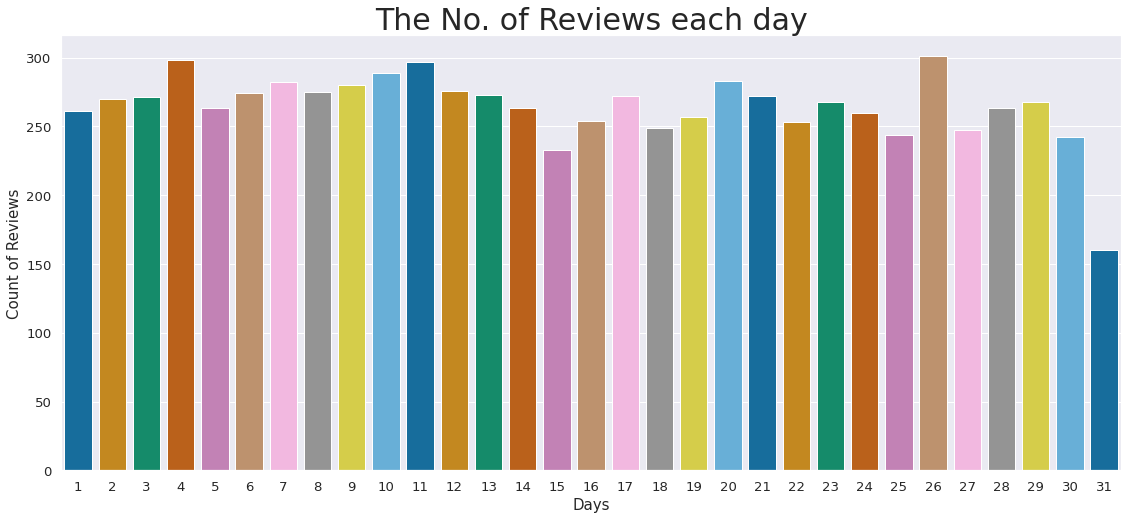

In [68]:
# looking at the no. of reviews in each of the day

plt.rcParams['figure.figsize'] = (19, 8)
sns.countplot(data['day'], palette ='colorblind')
plt.title('The No. of Reviews each day', fontsize = 30)
plt.xlabel('Days', fontsize = 15)
plt.ylabel('Count of Reviews', fontsize = 15)
plt.show()

## VISUALIZATION OF USEFUL COUNT

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


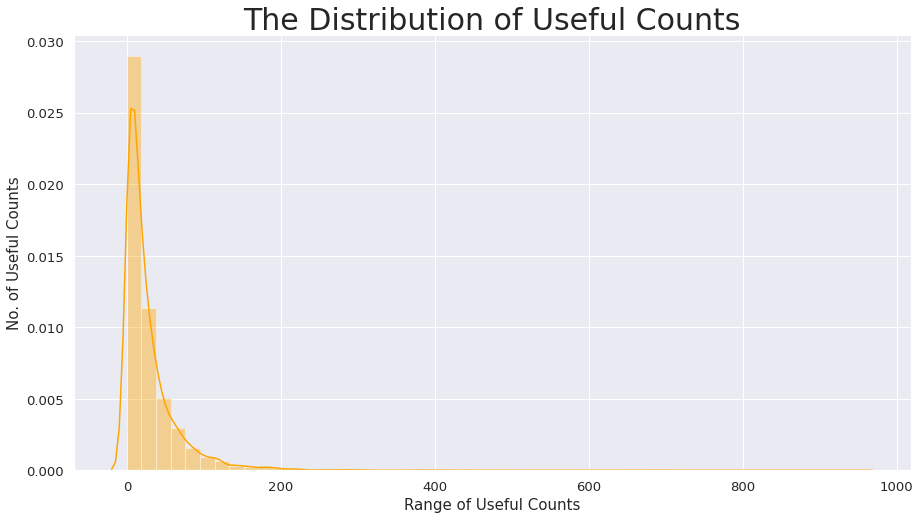

In [69]:
# plotting a dist plot

plt.rcParams['figure.figsize'] = (15, 8)
sns.distplot(data['usefulCount'], color = 'orange')
plt.title('The Distribution of Useful Counts', fontsize = 30)
plt.xlabel('Range of Useful Counts', fontsize = 15)
plt.ylabel('No. of Useful Counts', fontsize = 15)
plt.show()

In [70]:
def review_clean(review): 
    # changing to lower case
    lower = review.str.lower()
    
    # Replacing the repeating pattern of &#039;
    pattern_remove = lower.str.replace("&#039;", "")
    
    # Removing all the special Characters
    special_remove = pattern_remove.str.replace(r'[^\w\d\s]',' ')
    
    # Removing all the non ASCII characters
    ascii_remove = special_remove.str.replace(r'[^\x00-\x7F]+',' ')
    
    # Removing the leading and trailing Whitespaces
    whitespace_remove = ascii_remove.str.replace(r'^\s+|\s+?$','')
    
    # Replacing multiple Spaces with Single Space
    multiw_remove = whitespace_remove.str.replace(r'\s+',' ')
    
    # Replacing Two or more dots with one
    dataframe = multiw_remove.str.replace(r'\.{2,}', ' ')
    
    return dataframe

In [72]:
data['review_clean'] = review_clean(data['reviewComment'])

/tmp/ipykernel_1114202/3584754075.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  special_remove = pattern_remove.str.replace(r'[^\w\d\s]',' ')
/tmp/ipykernel_1114202/3584754075.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  ascii_remove = special_remove.str.replace(r'[^\x00-\x7F]+',' ')
/tmp/ipykernel_1114202/3584754075.py:15: FutureWarning: The default value of regex will change from True to False in a future version.
  whitespace_remove = ascii_remove.str.replace(r'^\s+|\s+?$','')
/tmp/ipykernel_1114202/3584754075.py:18: FutureWarning: The default value of regex will change from True to False in a future version.
  multiw_remove = whitespace_remove.str.replace(r'\s+',' ')
/tmp/ipykernel_1114202/3584754075.py:21: FutureWarning: The default value of regex will change from True to False in a future version.
  dataframe = multiw_remove.str.replace(r'\.{2,}', ' ')


In [74]:
from textblob import TextBlob
from nltk.corpus import stopwords
from collections import Counter
import warnings; warnings.simplefilter('ignore')
import nltk
import string
from nltk import ngrams
from nltk.tokenize import word_tokenize 
from nltk.stem import SnowballStemmer

# Removing the stopwords
stop_words = set(stopwords.words('english'))
data['review_clean'] = data['review_clean'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))

In [77]:
data['review_clean']

0       ive tri antidepress year citalopram fluoxetin ...
1       son crohn diseas done well asacol complaint sh...
2                                    quick reduct symptom
3       contrav combin drug use alcohol smoke opioid c...
4       birth control one cycl read review type simila...
                              ...                        
1194    work well spot rub notic extra rapid growth fa...
1195    took concerta high school 2 year live person h...
1196    quit abus medicin drink 2 1 2 year ago never t...
1197    develop irrit bowel syndrom c chronic constip ...
1198    doctor use propofol colonoscopi quick recov wi...
Name: review_clean, Length: 8198, dtype: object

In [76]:
# Removing the word stems using the Snowball Stemmer
Snow_ball = SnowballStemmer("english")
data['review_clean'] = data['review_clean'].apply(lambda x: " ".join(Snow_ball.stem(word) for word in x.split()))

In [78]:
data.head(3)

,recordId,drugName,condition,reviewComment,date,usefulCount,sideEffects,rating,Review_Sentiment,Year,month,day,review_clean
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",2012-02-28,22,Mild Side Effects,5,1.0,2012,2,28,ive tri antidepress year citalopram fluoxetin ...
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",2009-05-17,17,Severe Side Effects,4,0.0,2009,5,17,son crohn diseas done well asacol complaint sh...
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",2017-09-29,3,No Side Effects,5,1.0,2017,9,29,quick reduct symptom


In [79]:
def sentiment(review):
    # Sentiment polarity of the reviews
    pol = []
    for i in review:
        analysis = TextBlob(i)
        pol.append(analysis.sentiment.polarity)
    return pol

In [80]:
data['sentiment'] = sentiment(data['reviewComment'])

In [81]:
data['sentiment_clean'] = sentiment(data['review_clean'])

In [82]:
# Cleaning the reviews without removing the stop words and using snowball stemmer
data['review_clean_ss'] = review_clean(data['reviewComment'])
data['sentiment_clean_ss'] = sentiment(data['review_clean_ss'])

In [83]:
data = data.dropna(how="any", axis=0)

In [85]:
#Word count in each review
data['count_word']=data["review_clean_ss"].apply(lambda x: len(str(x).split()))

#Unique word count 
data['count_unique_word']=data["review_clean_ss"].apply(lambda x: len(set(str(x).split())))

#Letter count
data['count_letters']=data["review_clean_ss"].apply(lambda x: len(str(x)))

#punctuation count
data["count_punctuations"] = data["reviewComment"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

#upper case words count
data["count_words_upper"] = data["reviewComment"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

#title case words count
data["count_words_title"] = data["reviewComment"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

#Number of stopwords
data["count_stopwords"] = data["reviewComment"].apply(lambda x: len([w for w in str(x).lower().split() if w in stop_words]))

#Average length of the words
data["mean_word_len"] = data["review_clean_ss"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

In [86]:
data.columns

Index(['recordId', 'drugName', 'condition', 'reviewComment', 'date',
       'usefulCount', 'sideEffects', 'rating', 'Review_Sentiment', 'Year',
       'month', 'day', 'review_clean', 'sentiment', 'sentiment_clean',
       'review_clean_ss', 'sentiment_clean_ss', 'count_word',
       'count_unique_word', 'count_letters', 'count_punctuations',
       'count_words_upper', 'count_words_title', 'count_stopwords',
       'mean_word_len'],
      dtype='object')

## CORRELATION MATRIX

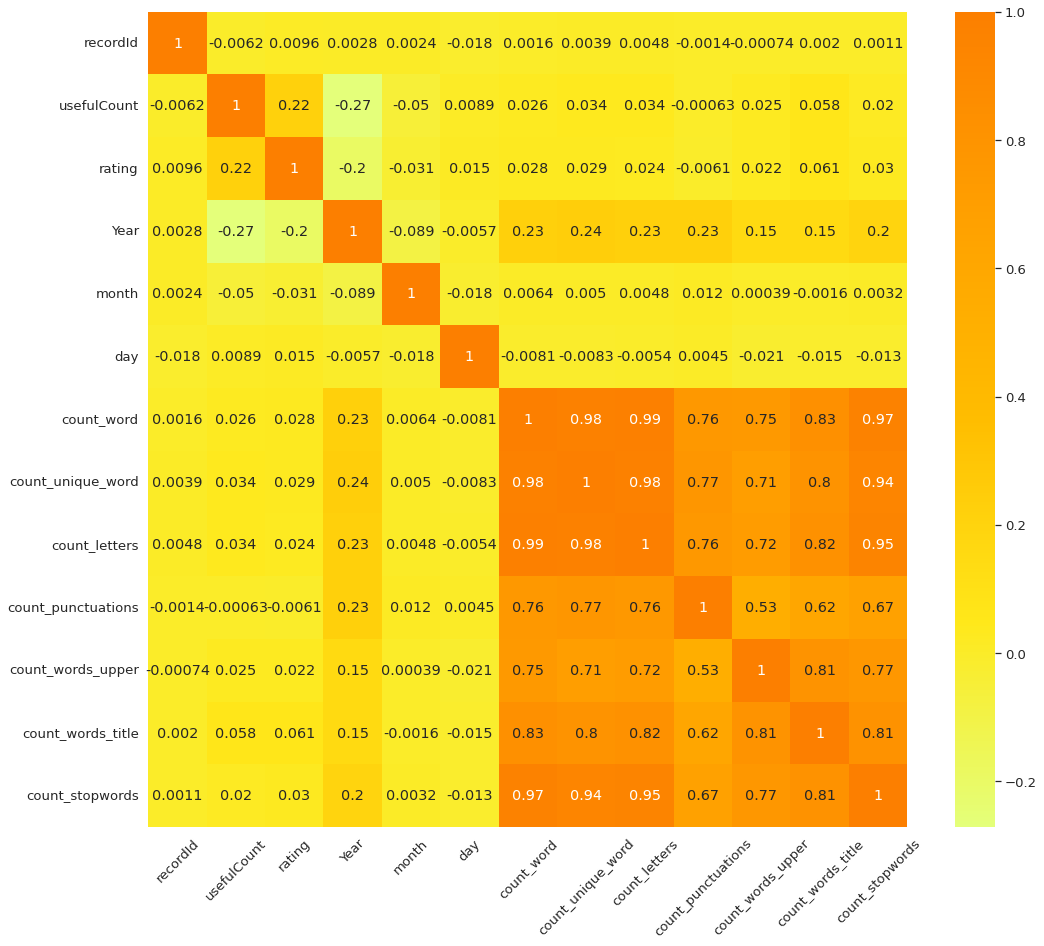

In [88]:
# Correlation Heatmap of the features engineered
plt.rcParams['figure.figsize'] = [17,15]
sns.set(font_scale = 1.2)
corr = data.select_dtypes(include = 'int64').corr()
sns_ = sns.heatmap(corr, annot = True, cmap = 'Wistia')
plt.setp(sns_.get_xticklabels(), rotation = 45);

## LABEL ENCODING

In [89]:
# Label Encoding Drugname and Conditions
from sklearn.preprocessing import LabelEncoder
label_encoder_feat = {}
for feature in ['drugName', 'condition']:
    label_encoder_feat[feature] = LabelEncoder()
    data[feature] = label_encoder_feat[feature].fit_transform(data[feature])

The Label Encoder is used to change the categorical values of Drug Names and the conditions in to numerical values for the machine learning modelling. There are 3,667 unique drugs in the dataset that's why One hot encoder is not used as it would generate 3,667 new features and it would be very computationally expensive.

## LIGHT GBM MODEL

LightGBM is a gradient boosting framework that uses treebased learning algorithms. It's designed to be distributed and efficient. It has many advantages like faster training speed and higher efficiency, lower memory usage, better accuracy and support of parallel and GPU learning, since it is based on decision tree algorithms, it splits the tree leaf wise with the best fit.

In [94]:
# Importing Libraries for the Machine Learning Model
from xgboost import XGBClassifier
from lightgbm import LGBMModel,LGBMClassifier, plot_importance
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split

In [131]:
# Defining Features and splitting the data as train and test set

features = data[['condition', 'usefulCount', 'sentiment', 'day', 'month', 'Year',
                   'sentiment_clean_ss', 'count_word', 'count_unique_word', 'count_letters',
                   'count_punctuations', 'count_words_upper', 'count_words_title',
                   'count_stopwords', 'mean_word_len']]

target = data['rating']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 20)
print ("The Train set size ", X_train.shape)
print ("The Test set size ", X_test.shape)

The Train set size  (6527, 15)
The Test set size  (1632, 15)


In [135]:
# Training Model - I
clf = LGBMClassifier(
        n_estimators=1000,
        learning_rate=0.1,
        num_leaves=30,
        subsample=.9,
        max_depth=7,
        reg_alpha=.1,
        reg_lambda=.1,
        min_split_gain=.01,
        min_child_weight=2,
        silent=-1,
        verbose=-1,
        )
model = clf.fit(X_train, y_train)

# Predictions
predictions = model.predict(X_test)
print ("The Accuracy of the model is : ", accuracy_score(y_test, predictions))
print ("The confusion Matrix is ")
confusion_matrix(y_test, predictions)

The Accuracy of the model is :  0.5018382352941176
The confusion Matrix is 


array([[127,  11,  12,  25, 120],
       [ 36,   5,   7,   4,  71],
       [ 27,   6,   7,  13,  79],
       [ 31,   4,  12,  44, 202],
       [ 80,   9,   8,  56, 636]])

In [138]:
print(predictions)

[5 5 1 ... 5 5 4]


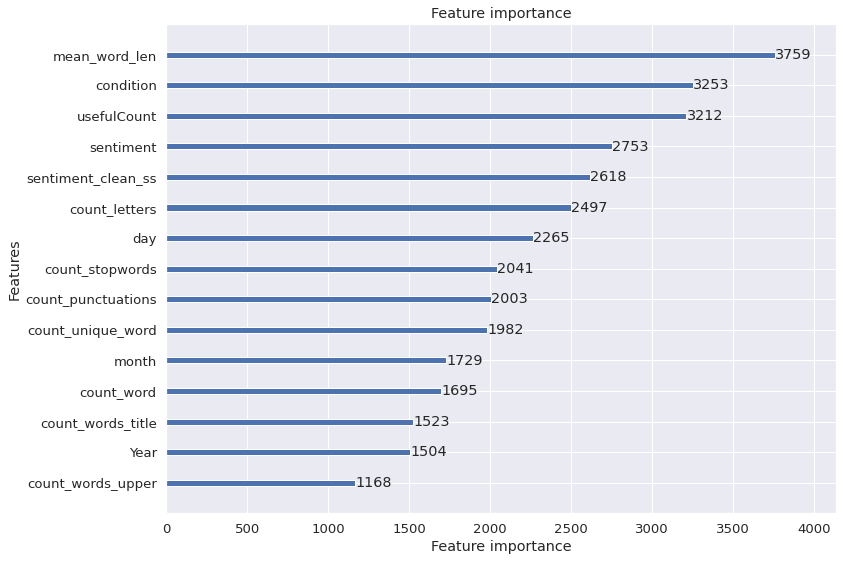

In [114]:
# Feature Importance Plot using LGBM
plt.rcParams['figure.figsize'] = [12, 9]
sns.set(style = 'darkgrid', font_scale = 1.2)
plot_importance(model);

In [123]:
X_test

,condition,usefulCount,sentiment,day,month,Year,sentiment_clean_ss,count_word,count_unique_word,count_letters,count_punctuations,count_words_upper,count_words_title,count_stopwords,mean_word_len
1907,219,26,0.165000,7,3,2017,0.165000,138,94,718,11,8,12,70,4.210145
5144,408,15,0.189583,18,12,2015,0.177083,73,53,349,9,3,10,35,3.794521
6979,62,8,-0.026923,13,8,2016,-0.037363,98,70,519,24,5,6,40,4.306122
1045,73,2,-0.202381,28,2,2016,-0.202381,63,49,292,13,4,6,30,3.650794
4580,350,15,0.046652,18,2,2017,0.046652,89,75,502,34,0,11,29,4.651685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
925,73,18,0.053247,19,1,2015,0.053247,138,83,674,22,8,14,65,3.891304
4220,23,31,0.183333,19,6,2008,0.183333,19,16,100,5,2,4,4,4.315789
6149,280,94,0.341296,26,7,2014,0.329630,143,102,724,19,5,11,63,4.069930
4116,301,45,0.158333,19,10,2016,0.158333,92,63,509,12,5,12,44,4.543478


In [128]:
features = data[['condition', 'usefulCount', 'reviewComment', 'sideEffects']]
target = data['rating']

In [129]:
features

,condition,usefulCount,reviewComment,sideEffects
0,123,22,"""I&#039;ve tried a few antidepressants over th...",Mild Side Effects
1,116,17,"""My son has Crohn&#039;s disease and has done ...",Severe Side Effects
2,402,3,"""Quick reduction of symptoms""",No Side Effects
3,417,35,"""Contrave combines drugs that were used for al...",Mild Side Effects
4,73,4,"""I have been on this birth control for one cyc...",Severe Side Effects
...,...,...,...,...
1194,33,81,"""Did not work well in the spots where I rubbed...",No Side Effects
1195,20,16,"""I took Concerta when I was in high school for...",Mild Side Effects
1196,370,15,"""I quit abusing medicines and drinking 2 1/2 y...",Extremely Severe Side Effects
1197,222,73,"""I developed Irritable Bowel Syndrome-C and ch...",Mild Side Effects


In [130]:
target

0       5
1       4
2       5
3       5
4       5
       ..
1194    2
1195    1
1196    4
1197    5
1198    5
Name: rating, Length: 8159, dtype: int64